# Importing Required Libraries 

In [121]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup

In [122]:
#fetching the data from the website called as makaan.com
title = []
pricing = []
state_of_flat = []
location =[]
builder = []
areaPerSqft = []
possession = []
flatAreaInSqft = []
for i in range(1,30):
    URL = "https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?_=1638357292518&page={}".format(i)
    #cardLayout clearfix
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    for x in soup.find_all('div', attrs = {'class' : 'cardLayout clearfix'} ):
            
        building_name = x.find('div',class_="title-line")
        if building_name is None :
            title.append(np.nan)
        else :
            title.append(building_name.text)
            
        prices = x.find('td',class_="price")
        if prices is None :
            pricing.append(np.nan)
        else :
            pricing.append(prices.text)
            
        status = x.find('td',class_="val")
        if status is None :
            state_of_flat.append(np.nan)
        else :
            state_of_flat.append(status.text)
        
        location_1 = x.find('span',class_="locName")
        if location_1 is None :
            location.append(np.nan)
        else :
            location.append(location_1.text)
            
        builder_det = x.find('div',class_="seller-wrap clearfix")
        if builder_det is None :
            builder.append(np.nan)
        else :
            builder.append(builder_det.text)
            
        area_persft = x.find('td',class_="lbl rate")
        if area_persft is None :
            areaPerSqft.append(np.nan)
        else :
            areaPerSqft.append(area_persft.text)
            
        mov_date = x.find('li',class_="keypoint")
        if mov_date is None :
            possession.append(np.nan)
        else :
            possession.append(mov_date.text)
            
        flat_area = x.find('td',class_="size")
        if flat_area is None :
            flatAreaInSqft.append(np.nan)
        else :
            flatAreaInSqft.append(flat_area.text)
    


In [123]:
df = pd.DataFrame({'title' : title, 'price_of_flat' : pricing , 'status_of_flat' : state_of_flat, 'location_of_flat' : location , 'name_of_construction_company' : builder , 'cost_per_sqft' : areaPerSqft , 'Date_of_completion' : possession , 'flat_area_ins_sqft' : flatAreaInSqft   })

In [124]:
df.head()

,title,price_of_flat,status_of_flat,location_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft
0,3 BHK Apartment in GHR Titania,1.3 Cr,Under Construction,"Kondapur, Hyderabad",GGHR InfraBUILDER0,"6,749 / sq ft",Possession by Nov 2023,1933
1,3 BHK Apartment in Om Sree Heights,1.47 Cr,Under Construction,"Yapral, Hyderabad",OOm Sree Builders And DevelopersBUILDER0,"5,800 / sq ft",Possession by May 2023,2545
2,1 BHK Apartment in Ramky Golden Circle,37.79 L,Under Construction,"Tukkuguda, Hyderabad",Ramky Estates Farms LtdBUILDER0,"4,499 / sq ft",Possession by Nov 2023,840
3,3 BHK Apartment in Cybercity Westbrook,1.4 Cr,Under Construction,"Kokapet, Hyderabad",Cyber City OrianaBUILDER0,"7,199 / sq ft",Possession by Sep 2026,1950
4,4 BHK Villa in Sreenidhi Luxury Park 2,2.27 Cr,Under Construction,"Shamshabad, Hyderabad",SupriyaBUILDER0,"6,500 / sq ft",Possession by Nov 2023,3499


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   title                         580 non-null    object
 1   price_of_flat                 580 non-null    object
 2   status_of_flat                580 non-null    object
 3   location_of_flat              580 non-null    object
 4   name_of_construction_company  580 non-null    object
 5   cost_per_sqft                 580 non-null    object
 6   Date_of_completion            575 non-null    object
 7   flat_area_ins_sqft            580 non-null    object
dtypes: object(8)
memory usage: 36.4+ KB


# Converting Raw data into Csv file

In [126]:
df.to_csv('final_scrapping.csv',index = False)

# Reading the csv file 

In [127]:
df = pd.read_csv("final_scrapping.csv")

df.head()

,title,price_of_flat,status_of_flat,location_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft
0,3 BHK Apartment in GHR Titania,1.3 Cr,Under Construction,"Kondapur, Hyderabad",GGHR InfraBUILDER0,"6,749 / sq ft",Possession by Nov 2023,1933
1,3 BHK Apartment in Om Sree Heights,1.47 Cr,Under Construction,"Yapral, Hyderabad",OOm Sree Builders And DevelopersBUILDER0,"5,800 / sq ft",Possession by May 2023,2545
2,1 BHK Apartment in Ramky Golden Circle,37.79 L,Under Construction,"Tukkuguda, Hyderabad",Ramky Estates Farms LtdBUILDER0,"4,499 / sq ft",Possession by Nov 2023,840
3,3 BHK Apartment in Cybercity Westbrook,1.4 Cr,Under Construction,"Kokapet, Hyderabad",Cyber City OrianaBUILDER0,"7,199 / sq ft",Possession by Sep 2026,1950
4,4 BHK Villa in Sreenidhi Luxury Park 2,2.27 Cr,Under Construction,"Shamshabad, Hyderabad",SupriyaBUILDER0,"6,500 / sq ft",Possession by Nov 2023,3499


# Using RegEx for maniplulating the columns

In [128]:
regex = r'^[0-9]\s[A-Z]+\s[A-Za-z]+'
df['rooms'] = df['title'].apply(lambda x : re.findall(regex,x))

In [129]:
regex = r'^[A-Za-z]+'
df['area_in_city'] = df['location_of_flat'].apply(lambda x : re.findall(regex,x))

In [130]:
regex = r'[in]+\s[A-Za-z\s]+'
df['place_circle_of_flat'] = df['title'].apply(lambda x : re.findall(regex,x))

# Checking the info of new columns as per our requirements

In [131]:
#initially there is 1 numercial column out of 11 columns
#and few lolumns contain null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   title                         580 non-null    object
 1   price_of_flat                 580 non-null    object
 2   status_of_flat                580 non-null    object
 3   location_of_flat              580 non-null    object
 4   name_of_construction_company  580 non-null    object
 5   cost_per_sqft                 580 non-null    object
 6   Date_of_completion            575 non-null    object
 7   flat_area_ins_sqft            580 non-null    int64 
 8   rooms                         580 non-null    object
 9   area_in_city                  580 non-null    object
 10  place_circle_of_flat          580 non-null    object
dtypes: int64(1), object(10)
memory usage: 50.0+ KB


# Converting the list elements of single column into a string

In [132]:
df['area_in_city'] = df['area_in_city'].apply(lambda x : ''.join(x))
df.rooms = df.rooms.apply(lambda x : ''.join(x))
df['place_circle_of_flat'] = df['place_circle_of_flat'].apply(lambda x : ''.join(x))

# Creating new column and converting into string

In [133]:
regex = r'^[0-9]+'
df['no_of_rooms'] = df['rooms'].apply(lambda x : re.findall(regex,x) )
df['no_of_rooms'] = df['no_of_rooms'].apply(lambda x : ''.join(x))

In [134]:
df.head()

,title,price_of_flat,status_of_flat,location_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,rooms,area_in_city,place_circle_of_flat,no_of_rooms
0,3 BHK Apartment in GHR Titania,1.3 Cr,Under Construction,"Kondapur, Hyderabad",GGHR InfraBUILDER0,"6,749 / sq ft",Possession by Nov 2023,1933,3 BHK Apartment,Kondapur,in GHR Titania,3
1,3 BHK Apartment in Om Sree Heights,1.47 Cr,Under Construction,"Yapral, Hyderabad",OOm Sree Builders And DevelopersBUILDER0,"5,800 / sq ft",Possession by May 2023,2545,3 BHK Apartment,Yapral,in Om Sree Heights,3
2,1 BHK Apartment in Ramky Golden Circle,37.79 L,Under Construction,"Tukkuguda, Hyderabad",Ramky Estates Farms LtdBUILDER0,"4,499 / sq ft",Possession by Nov 2023,840,1 BHK Apartment,Tukkuguda,in Ramky Golden Circle,1
3,3 BHK Apartment in Cybercity Westbrook,1.4 Cr,Under Construction,"Kokapet, Hyderabad",Cyber City OrianaBUILDER0,"7,199 / sq ft",Possession by Sep 2026,1950,3 BHK Apartment,Kokapet,in Cybercity Westbrook,3
4,4 BHK Villa in Sreenidhi Luxury Park 2,2.27 Cr,Under Construction,"Shamshabad, Hyderabad",SupriyaBUILDER0,"6,500 / sq ft",Possession by Nov 2023,3499,4 BHK Villa,Shamshabad,in Sreenidhi Luxury Park,4


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   title                         580 non-null    object
 1   price_of_flat                 580 non-null    object
 2   status_of_flat                580 non-null    object
 3   location_of_flat              580 non-null    object
 4   name_of_construction_company  580 non-null    object
 5   cost_per_sqft                 580 non-null    object
 6   Date_of_completion            575 non-null    object
 7   flat_area_ins_sqft            580 non-null    int64 
 8   rooms                         580 non-null    object
 9   area_in_city                  580 non-null    object
 10  place_circle_of_flat          580 non-null    object
 11  no_of_rooms                   580 non-null    object
dtypes: int64(1), object(11)
memory usage: 54.5+ KB


# Manipulating the dataframe

# Converting the object to numerical columns
# price_of_flat

In [136]:
df['price_of_flat']

0        1.3 Cr
1       1.47 Cr
2       37.79 L
3        1.4 Cr
4       2.27 Cr
         ...   
575        70 L
576        70 L
577      1.2 Cr
578        5 Cr
579        70 L
Name: price_of_flat, Length: 580, dtype: object

In [137]:
df['price_of_flat'].value_counts()

 1.15 Cr    8
 1.4 Cr     7
 1.1 Cr     7
 1.05 Cr    6
 75 L       6
           ..
 76.73 L    1
 86.15 L    1
 92.4 L     1
 54.66 L    1
 6.65 Cr    1
Name: price_of_flat, Length: 367, dtype: int64

In [138]:
# float(x.replace('€','').replace('K','')) * 1000 if 'K' in x
df['price_of_flat'] = df['price_of_flat'].apply(lambda x :  float(x.replace('L','')) * 100000 if 'L' in x else float(x.replace('Cr','')) * 10000000 if 'Cr' in x else float(x.replace('K','')) * 1000 if 'K' in x else x)

df['price_of_flat'] = df['price_of_flat'].astype(float)

In [139]:
df['price_of_flat']

0      13000000.0
1      14700000.0
2       3779000.0
3      14000000.0
4      22700000.0
          ...    
575     7000000.0
576     7000000.0
577    12000000.0
578    50000000.0
579     7000000.0
Name: price_of_flat, Length: 580, dtype: float64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         580 non-null    object 
 1   price_of_flat                 580 non-null    float64
 2   status_of_flat                580 non-null    object 
 3   location_of_flat              580 non-null    object 
 4   name_of_construction_company  580 non-null    object 
 5   cost_per_sqft                 580 non-null    object 
 6   Date_of_completion            575 non-null    object 
 7   flat_area_ins_sqft            580 non-null    int64  
 8   rooms                         580 non-null    object 
 9   area_in_city                  580 non-null    object 
 10  place_circle_of_flat          580 non-null    object 
 11  no_of_rooms                   580 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 54.5+ KB


In [141]:
df.head()

,title,price_of_flat,status_of_flat,location_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,rooms,area_in_city,place_circle_of_flat,no_of_rooms
0,3 BHK Apartment in GHR Titania,13000000.0,Under Construction,"Kondapur, Hyderabad",GGHR InfraBUILDER0,"6,749 / sq ft",Possession by Nov 2023,1933,3 BHK Apartment,Kondapur,in GHR Titania,3
1,3 BHK Apartment in Om Sree Heights,14700000.0,Under Construction,"Yapral, Hyderabad",OOm Sree Builders And DevelopersBUILDER0,"5,800 / sq ft",Possession by May 2023,2545,3 BHK Apartment,Yapral,in Om Sree Heights,3
2,1 BHK Apartment in Ramky Golden Circle,3779000.0,Under Construction,"Tukkuguda, Hyderabad",Ramky Estates Farms LtdBUILDER0,"4,499 / sq ft",Possession by Nov 2023,840,1 BHK Apartment,Tukkuguda,in Ramky Golden Circle,1
3,3 BHK Apartment in Cybercity Westbrook,14000000.0,Under Construction,"Kokapet, Hyderabad",Cyber City OrianaBUILDER0,"7,199 / sq ft",Possession by Sep 2026,1950,3 BHK Apartment,Kokapet,in Cybercity Westbrook,3
4,4 BHK Villa in Sreenidhi Luxury Park 2,22700000.0,Under Construction,"Shamshabad, Hyderabad",SupriyaBUILDER0,"6,500 / sq ft",Possession by Nov 2023,3499,4 BHK Villa,Shamshabad,in Sreenidhi Luxury Park,4


# cost_per_sqft

In [142]:
df['cost_per_sqft']

0       6,749 / sq ft
1       5,800 / sq ft
2       4,499 / sq ft
3       7,199 / sq ft
4       6,500 / sq ft
            ...      
575     4,430 / sq ft
576     4,794 / sq ft
577     6,000 / sq ft
578    14,204 / sq ft
579     4,794 / sq ft
Name: cost_per_sqft, Length: 580, dtype: object

In [143]:
regex = r'[0-9,]+'
df['cost_per_sqft'] = df['cost_per_sqft'].apply(lambda x : re.findall(regex,x))

In [144]:
df['cost_per_sqft']

0       [6,749]
1       [5,800]
2       [4,499]
3       [7,199]
4       [6,500]
         ...   
575     [4,430]
576     [4,794]
577     [6,000]
578    [14,204]
579     [4,794]
Name: cost_per_sqft, Length: 580, dtype: object

In [145]:
df['cost_per_sqft'] = df['cost_per_sqft'].apply(lambda x : ''.join(x))

In [146]:
df['cost_per_sqft']

0       6,749
1       5,800
2       4,499
3       7,199
4       6,500
        ...  
575     4,430
576     4,794
577     6,000
578    14,204
579     4,794
Name: cost_per_sqft, Length: 580, dtype: object

In [ ]:
s='$hsjire324gnbv&jhjhg*gfhg$fhgfh#hgfhg@'


In [147]:
df['cost_per_sqft'] = df['cost_per_sqft'].apply(lambda x : float(x.replace(',','')) if ',' in x else x )
df['cost_per_sqft'] = df['cost_per_sqft'].astype(float)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         580 non-null    object 
 1   price_of_flat                 580 non-null    float64
 2   status_of_flat                580 non-null    object 
 3   location_of_flat              580 non-null    object 
 4   name_of_construction_company  580 non-null    object 
 5   cost_per_sqft                 580 non-null    float64
 6   Date_of_completion            575 non-null    object 
 7   flat_area_ins_sqft            580 non-null    int64  
 8   rooms                         580 non-null    object 
 9   area_in_city                  580 non-null    object 
 10  place_circle_of_flat          580 non-null    object 
 11  no_of_rooms                   580 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 54.5+ KB


In [149]:
df.head()

,title,price_of_flat,status_of_flat,location_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,rooms,area_in_city,place_circle_of_flat,no_of_rooms
0,3 BHK Apartment in GHR Titania,13000000.0,Under Construction,"Kondapur, Hyderabad",GGHR InfraBUILDER0,6749.0,Possession by Nov 2023,1933,3 BHK Apartment,Kondapur,in GHR Titania,3
1,3 BHK Apartment in Om Sree Heights,14700000.0,Under Construction,"Yapral, Hyderabad",OOm Sree Builders And DevelopersBUILDER0,5800.0,Possession by May 2023,2545,3 BHK Apartment,Yapral,in Om Sree Heights,3
2,1 BHK Apartment in Ramky Golden Circle,3779000.0,Under Construction,"Tukkuguda, Hyderabad",Ramky Estates Farms LtdBUILDER0,4499.0,Possession by Nov 2023,840,1 BHK Apartment,Tukkuguda,in Ramky Golden Circle,1
3,3 BHK Apartment in Cybercity Westbrook,14000000.0,Under Construction,"Kokapet, Hyderabad",Cyber City OrianaBUILDER0,7199.0,Possession by Sep 2026,1950,3 BHK Apartment,Kokapet,in Cybercity Westbrook,3
4,4 BHK Villa in Sreenidhi Luxury Park 2,22700000.0,Under Construction,"Shamshabad, Hyderabad",SupriyaBUILDER0,6500.0,Possession by Nov 2023,3499,4 BHK Villa,Shamshabad,in Sreenidhi Luxury Park,4


# no_of_rooms

In [150]:
df['no_of_rooms'].value_counts()

3    295
2    146
4     60
      50
5     17
1     12
Name: no_of_rooms, dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         580 non-null    object 
 1   price_of_flat                 580 non-null    float64
 2   status_of_flat                580 non-null    object 
 3   location_of_flat              580 non-null    object 
 4   name_of_construction_company  580 non-null    object 
 5   cost_per_sqft                 580 non-null    float64
 6   Date_of_completion            575 non-null    object 
 7   flat_area_ins_sqft            580 non-null    int64  
 8   rooms                         580 non-null    object 
 9   area_in_city                  580 non-null    object 
 10  place_circle_of_flat          580 non-null    object 
 11  no_of_rooms                   580 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 54.5+ KB


In [152]:
df.no_of_rooms

0      3
1      3
2      1
3      3
4      4
      ..
575    3
576    3
577    3
578    5
579    3
Name: no_of_rooms, Length: 580, dtype: object

# checking for object columns(null values)

In [153]:
df['status_of_flat'].value_counts()

Under Construction    419
Ready to move         112
New                    28
Resale                 21
Name: status_of_flat, dtype: int64

In [154]:
df['Date_of_completion'].value_counts()

Possession by Feb 2022    72
Possession by Nov 2023    47
Possession by Nov 2022    41
2 Bathrooms               30
Possession by Nov 2021    29
2 - 3 years old           29
Possession by Jun 2023    25
Possession by Oct 2022    22
0 - 1 year old            21
Possession by Aug 2022    21
Possession by Oct 2023    20
Possession by Jul 2022    19
Possession by Nov 2024    18
Possession by May 2023    16
1 year old                15
Possession by Dec 2021    11
Possession by Sep 2026    10
Possession by Dec 2022    10
3 Bathrooms               10
Possession by Mar 2022     8
Possession by Jan 2023     8
1 - 2 years old            8
Possession by May 2025     8
Possession by Dec 2026     8
4 - 5 years old            6
Possession by May 2024     5
Possession by Oct 2024     5
Possession by Sep 2021     5
Possession by Mar 2023     5
Possession by Feb 2025     4
1 open sides               4
2 open sides               4
5 - 6 years old            4
4 Bathrooms                3
Possession by 

In [155]:
#df['Date_of_completion'] = df['Date_of_completion'].apply(lambda x : x.replace('Bathrooms','') if 'Bathrooms' in x else )

In [156]:
# df.drop(df[df['Fee'] >= 24000].index, inplace = True)

In [157]:
#dropping unnecessary columns
df.drop(df[df['Date_of_completion'] == '5 Bathrooms'].index , inplace = True)

In [158]:
df.drop(df[df['Date_of_completion'] == '2 Bathrooms'].index ,  inplace = True)


In [159]:
df.drop(df[df['Date_of_completion'] == '4 open sides'].index , inplace = True)


In [160]:
df.drop(df[df['Date_of_completion'] == 'West facing'].index, inplace = True)


In [161]:
df.drop(df[df['Date_of_completion'] == '3 Bathrooms'].index, inplace = True)


In [162]:
df.drop(df[df['Date_of_completion'] == '4 open sides'].index, inplace = True)


In [163]:
df.drop(df[df['Date_of_completion'] == '1 open sides'].index, inplace = True)


In [164]:
df.drop(df[df['Date_of_completion'] == '5 open sides'].index, inplace = True)

In [165]:
df.drop(df[df['Date_of_completion'] == '2 open sides'].index, inplace = True)

In [166]:
df.drop(df[df['Date_of_completion'] == '4 open sides'].index, inplace = True)

In [167]:
df.drop(df[df['Date_of_completion'] == '4 Bathrooms'].index, inplace = True)


In [168]:
df.head()

,title,price_of_flat,status_of_flat,location_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,rooms,area_in_city,place_circle_of_flat,no_of_rooms
0,3 BHK Apartment in GHR Titania,13000000.0,Under Construction,"Kondapur, Hyderabad",GGHR InfraBUILDER0,6749.0,Possession by Nov 2023,1933,3 BHK Apartment,Kondapur,in GHR Titania,3
1,3 BHK Apartment in Om Sree Heights,14700000.0,Under Construction,"Yapral, Hyderabad",OOm Sree Builders And DevelopersBUILDER0,5800.0,Possession by May 2023,2545,3 BHK Apartment,Yapral,in Om Sree Heights,3
2,1 BHK Apartment in Ramky Golden Circle,3779000.0,Under Construction,"Tukkuguda, Hyderabad",Ramky Estates Farms LtdBUILDER0,4499.0,Possession by Nov 2023,840,1 BHK Apartment,Tukkuguda,in Ramky Golden Circle,1
3,3 BHK Apartment in Cybercity Westbrook,14000000.0,Under Construction,"Kokapet, Hyderabad",Cyber City OrianaBUILDER0,7199.0,Possession by Sep 2026,1950,3 BHK Apartment,Kokapet,in Cybercity Westbrook,3
4,4 BHK Villa in Sreenidhi Luxury Park 2,22700000.0,Under Construction,"Shamshabad, Hyderabad",SupriyaBUILDER0,6500.0,Possession by Nov 2023,3499,4 BHK Villa,Shamshabad,in Sreenidhi Luxury Park,4


In [169]:
df['Date_of_completion'].value_counts()

Possession by Feb 2022    72
Possession by Nov 2023    47
Possession by Nov 2022    41
2 - 3 years old           29
Possession by Nov 2021    29
Possession by Jun 2023    25
Possession by Oct 2022    22
0 - 1 year old            21
Possession by Aug 2022    21
Possession by Oct 2023    20
Possession by Jul 2022    19
Possession by Nov 2024    18
Possession by May 2023    16
1 year old                15
Possession by Dec 2021    11
Possession by Sep 2026    10
Possession by Dec 2022    10
Possession by Mar 2022     8
Possession by Dec 2026     8
1 - 2 years old            8
Possession by May 2025     8
Possession by Jan 2023     8
4 - 5 years old            6
Possession by Sep 2021     5
Possession by Oct 2024     5
Possession by May 2024     5
Possession by Mar 2023     5
5 - 6 years old            4
Possession by Feb 2025     4
3 - 4 years old            3
Possession by Jul 2023     3
Possession by Nov 2026     2
7 - 8 years old            2
Possession by Feb 2023     2
3 open sides  

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         525 non-null    object 
 1   price_of_flat                 525 non-null    float64
 2   status_of_flat                525 non-null    object 
 3   location_of_flat              525 non-null    object 
 4   name_of_construction_company  525 non-null    object 
 5   cost_per_sqft                 525 non-null    float64
 6   Date_of_completion            520 non-null    object 
 7   flat_area_ins_sqft            525 non-null    int64  
 8   rooms                         525 non-null    object 
 9   area_in_city                  525 non-null    object 
 10  place_circle_of_flat          525 non-null    object 
 11  no_of_rooms                   525 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 53.3+ KB


# Deleting the unwanted columns

In [171]:
df.drop(['location_of_flat', 'rooms'], axis = 1 , inplace = True)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 579
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         525 non-null    object 
 1   price_of_flat                 525 non-null    float64
 2   status_of_flat                525 non-null    object 
 3   name_of_construction_company  525 non-null    object 
 4   cost_per_sqft                 525 non-null    float64
 5   Date_of_completion            520 non-null    object 
 6   flat_area_ins_sqft            525 non-null    int64  
 7   area_in_city                  525 non-null    object 
 8   place_circle_of_flat          525 non-null    object 
 9   no_of_rooms                   525 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 45.1+ KB


In [173]:
df.head()

,title,price_of_flat,status_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,area_in_city,place_circle_of_flat,no_of_rooms
0,3 BHK Apartment in GHR Titania,13000000.0,Under Construction,GGHR InfraBUILDER0,6749.0,Possession by Nov 2023,1933,Kondapur,in GHR Titania,3
1,3 BHK Apartment in Om Sree Heights,14700000.0,Under Construction,OOm Sree Builders And DevelopersBUILDER0,5800.0,Possession by May 2023,2545,Yapral,in Om Sree Heights,3
2,1 BHK Apartment in Ramky Golden Circle,3779000.0,Under Construction,Ramky Estates Farms LtdBUILDER0,4499.0,Possession by Nov 2023,840,Tukkuguda,in Ramky Golden Circle,1
3,3 BHK Apartment in Cybercity Westbrook,14000000.0,Under Construction,Cyber City OrianaBUILDER0,7199.0,Possession by Sep 2026,1950,Kokapet,in Cybercity Westbrook,3
4,4 BHK Villa in Sreenidhi Luxury Park 2,22700000.0,Under Construction,SupriyaBUILDER0,6500.0,Possession by Nov 2023,3499,Shamshabad,in Sreenidhi Luxury Park,4


In [174]:
df.shape

(525, 10)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 579
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         525 non-null    object 
 1   price_of_flat                 525 non-null    float64
 2   status_of_flat                525 non-null    object 
 3   name_of_construction_company  525 non-null    object 
 4   cost_per_sqft                 525 non-null    float64
 5   Date_of_completion            520 non-null    object 
 6   flat_area_ins_sqft            525 non-null    int64  
 7   area_in_city                  525 non-null    object 
 8   place_circle_of_flat          525 non-null    object 
 9   no_of_rooms                   525 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 45.1+ KB


# Manipulating the Construction company column

In [176]:
df['name_of_construction_company'].value_counts()

EAPL GroupBUILDER0                             64
Anuhar Homes Pvt LtdBUILDER0                   40
SsellerVERIFIED OWNER                          35
Riddhi GroupBUILDER0                           28
GaneshAGENT0                                   24
UuserBUILDER0                                  22
Risinia BuildersBUILDER0                       20
APR GroupBUILDER0                              19
M KartheekAGENT0                               19
HHallmark BuildersBUILDER0                     19
Maruthi DevelopersBUILDER0                     17
Ramky Estates Farms LtdBUILDER0                16
OOm Sree Builders And DevelopersBUILDER0       16
MMKT Praneeth HomesAGENT0                      15
SSalarpuria SattvaBUILDER0                     14
Vessella GroupBUILDER0                         14
Ayati PropertiesBUILDER0                       12
Cyber City OrianaBUILDER0                      10
GGT Infra Projects Pvt LtdBUILDER0             10
Sri Sai Hari Hara Estates Pvt LtdBUILDER0      10


In [177]:
df['name_of_construction_company'].replace(to_replace=["BUILDER0","AGENT0","OWNER"],value="",inplace=True,regex=True)

In [178]:
df['name_of_construction_company'].value_counts()

EAPL Group                             64
Anuhar Homes Pvt Ltd                   40
SsellerVERIFIED                        35
Riddhi Group                           28
Ganesh                                 24
Uuser                                  22
Risinia Builders                       20
APR Group                              19
HHallmark Builders                     19
M Kartheek                             19
Maruthi Developers                     17
Ramky Estates Farms Ltd                16
OOm Sree Builders And Developers       16
MMKT Praneeth Homes                    15
SSalarpuria Sattva                     14
Vessella Group                         14
Ayati Properties                       12
HHaripriya Developer                   10
Sri Sai Hari Hara Estates Pvt Ltd      10
Cyber City Oriana                      10
GGT Infra Projects Pvt Ltd             10
Vaishnavi Infracon India Pvt Ltd        8
Sumadhura Infracon Pvt Ltd              8
GGHR Infra                        

In [179]:
df.head()

,title,price_of_flat,status_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,area_in_city,place_circle_of_flat,no_of_rooms
0,3 BHK Apartment in GHR Titania,13000000.0,Under Construction,GGHR Infra,6749.0,Possession by Nov 2023,1933,Kondapur,in GHR Titania,3
1,3 BHK Apartment in Om Sree Heights,14700000.0,Under Construction,OOm Sree Builders And Developers,5800.0,Possession by May 2023,2545,Yapral,in Om Sree Heights,3
2,1 BHK Apartment in Ramky Golden Circle,3779000.0,Under Construction,Ramky Estates Farms Ltd,4499.0,Possession by Nov 2023,840,Tukkuguda,in Ramky Golden Circle,1
3,3 BHK Apartment in Cybercity Westbrook,14000000.0,Under Construction,Cyber City Oriana,7199.0,Possession by Sep 2026,1950,Kokapet,in Cybercity Westbrook,3
4,4 BHK Villa in Sreenidhi Luxury Park 2,22700000.0,Under Construction,Supriya,6500.0,Possession by Nov 2023,3499,Shamshabad,in Sreenidhi Luxury Park,4


# Manipulating the place_circle_of_flat column

In [180]:
df['place_circle_of_flat'].replace(to_replace=["in"],value="",inplace=True,regex=True)

In [181]:
df['place_circle_of_flat'].value_counts()

 Engeers Sri Tirumala Millennium Phase II         64
 Sunyuga Luxurious Apartments                     24
 Anuhar Rami Reddy Towers                         21
                                                  20
 Aliens Space Station                             19
                                                  ..
 Ja Carlton Creek                                  1
 Ananda Palm Sprgs                                 1
 Nature Natures Yadadri Ambience Platum Sector     1
 Sai Priya Gardens Plot                            1
 Muppa Melody                                      1
Name: place_circle_of_flat, Length: 71, dtype: int64

In [182]:
df.head()

,title,price_of_flat,status_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,area_in_city,place_circle_of_flat,no_of_rooms
0,3 BHK Apartment in GHR Titania,13000000.0,Under Construction,GGHR Infra,6749.0,Possession by Nov 2023,1933,Kondapur,GHR Titania,3
1,3 BHK Apartment in Om Sree Heights,14700000.0,Under Construction,OOm Sree Builders And Developers,5800.0,Possession by May 2023,2545,Yapral,Om Sree Heights,3
2,1 BHK Apartment in Ramky Golden Circle,3779000.0,Under Construction,Ramky Estates Farms Ltd,4499.0,Possession by Nov 2023,840,Tukkuguda,Ramky Golden Circle,1
3,3 BHK Apartment in Cybercity Westbrook,14000000.0,Under Construction,Cyber City Oriana,7199.0,Possession by Sep 2026,1950,Kokapet,Cybercity Westbrook,3
4,4 BHK Villa in Sreenidhi Luxury Park 2,22700000.0,Under Construction,Supriya,6500.0,Possession by Nov 2023,3499,Shamshabad,Sreenidhi Luxury Park,4


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 579
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         525 non-null    object 
 1   price_of_flat                 525 non-null    float64
 2   status_of_flat                525 non-null    object 
 3   name_of_construction_company  525 non-null    object 
 4   cost_per_sqft                 525 non-null    float64
 5   Date_of_completion            520 non-null    object 
 6   flat_area_ins_sqft            525 non-null    int64  
 7   area_in_city                  525 non-null    object 
 8   place_circle_of_flat          525 non-null    object 
 9   no_of_rooms                   525 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 45.1+ KB


# Checking null Values

In [184]:
df['no_of_rooms'].isnull().sum()

0

In [185]:
df['no_of_rooms'].value_counts()

3    283
2    120
4     56
      40
5     14
1     12
Name: no_of_rooms, dtype: int64

In [186]:
df.drop(df[df['no_of_rooms'] == ''].index, inplace = True)

In [187]:
df['no_of_rooms'].value_counts()

3    283
2    120
4     56
5     14
1     12
Name: no_of_rooms, dtype: int64

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 579
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         485 non-null    object 
 1   price_of_flat                 485 non-null    float64
 2   status_of_flat                485 non-null    object 
 3   name_of_construction_company  485 non-null    object 
 4   cost_per_sqft                 485 non-null    float64
 5   Date_of_completion            485 non-null    object 
 6   flat_area_ins_sqft            485 non-null    int64  
 7   area_in_city                  485 non-null    object 
 8   place_circle_of_flat          485 non-null    object 
 9   no_of_rooms                   485 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 41.7+ KB


# Converting the no_of_rooms column into numerical column

In [189]:
df['no_of_rooms'] = df['no_of_rooms'].astype(int)


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 579
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         485 non-null    object 
 1   price_of_flat                 485 non-null    float64
 2   status_of_flat                485 non-null    object 
 3   name_of_construction_company  485 non-null    object 
 4   cost_per_sqft                 485 non-null    float64
 5   Date_of_completion            485 non-null    object 
 6   flat_area_ins_sqft            485 non-null    int64  
 7   area_in_city                  485 non-null    object 
 8   place_circle_of_flat          485 non-null    object 
 9   no_of_rooms                   485 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 39.8+ KB


## The wanted columns are converted into numerical columns so that we can visualize the cleaned dataset

# Visualization

In [191]:
! pip install plotly

In [192]:
! pip install cufflinks

In [193]:
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
from plotly import tools
init_notebook_mode(connected=True)

In [194]:
df.head()

,title,price_of_flat,status_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,area_in_city,place_circle_of_flat,no_of_rooms
0,3 BHK Apartment in GHR Titania,13000000.0,Under Construction,GGHR Infra,6749.0,Possession by Nov 2023,1933,Kondapur,GHR Titania,3
1,3 BHK Apartment in Om Sree Heights,14700000.0,Under Construction,OOm Sree Builders And Developers,5800.0,Possession by May 2023,2545,Yapral,Om Sree Heights,3
2,1 BHK Apartment in Ramky Golden Circle,3779000.0,Under Construction,Ramky Estates Farms Ltd,4499.0,Possession by Nov 2023,840,Tukkuguda,Ramky Golden Circle,1
3,3 BHK Apartment in Cybercity Westbrook,14000000.0,Under Construction,Cyber City Oriana,7199.0,Possession by Sep 2026,1950,Kokapet,Cybercity Westbrook,3
4,4 BHK Villa in Sreenidhi Luxury Park 2,22700000.0,Under Construction,Supriya,6500.0,Possession by Nov 2023,3499,Shamshabad,Sreenidhi Luxury Park,4


In [195]:
#this graph shows the count(availability) of flats in particular city/locality
df['area_in_city'].iplot(
    kind='hist',
    bins=100,
    xTitle='Places in Hyderabad',
    color = 'red',
    linecolor='red',
    yTitle='count',
    title='Histogram of areas in city of Hyderabad')

In [79]:
#histogram plot
#this graph shows the count of prices of flat
#for eg: there are nearly 72 flats whose price lies between 7M and 7.999M
df.price_of_flat.iplot(
    kind='hist',
    bins=100,
    xTitle='prices of flats',
    linecolor='red',
    color = 'orange',
    yTitle='count',
    title='Histogram of prices of flats ')

In [215]:
#scatter plot 
#one numerical column i.e area_in_city
#one categorical column i.e price_of_flat

#for eg: in kondapur there are 5 flats with the highest price 16.5M lowest price 7.5M

import plotly.express as px
fig = px.scatter(x= df['area_in_city'].head(100), y=df['price_of_flat'].head(100))
fig.show()

In [81]:
#blue indicates the maximum i.e no. of rooms as 2
fig = px.pie(df,names='no_of_rooms', title='Percentage of Number of rooms in Hyderabad')
fig.show()

In [82]:
#it indicates the city versus cost per feet
#in particular city how much it costs for a square feet
import plotly.express as px
fig = px.scatter(x= df['area_in_city'], y=df['cost_per_sqft'])
fig.show()

In [83]:
#this graph indicates percentage of status of the flats
#for eg: ready to move and under construction
#there are many flats which are under construction

fig = px.pie(df,names='status_of_flat', title='Status of flats in Hyderabad')
fig.show()

In [84]:
#this grapgh shows count of property posessed by this date

df['Date_of_completion'].iplot(
    kind='hist',
    bins=100,
    xTitle="Time that we can own the flat",
    linecolor='black',
    color = 'blue',
    yTitle='count',
    title='Histogram of possession of flats  ')

In [85]:
df['name_of_construction_company'].iplot(
    kind='hist',
    bins=100,
    xTitle='Name of construction company',
    linecolor='red',
    color = 'white',
    yTitle='count',
    title='Histogram of construction companies ')

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:xlabel='cost_per_sqft', ylabel='Density'>

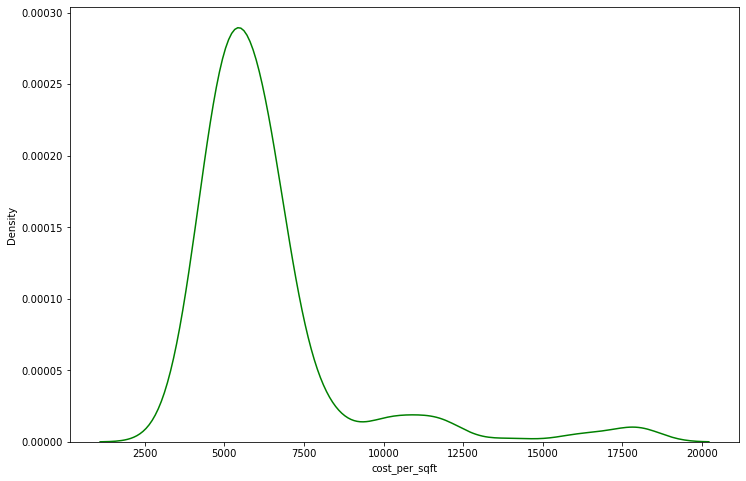

In [86]:
plt.figure(figsize = (12,8))
sns.distplot(df['cost_per_sqft'], kde = True,hist=False , rug = False , color = 'g')

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:xlabel='price_of_flat', ylabel='Density'>

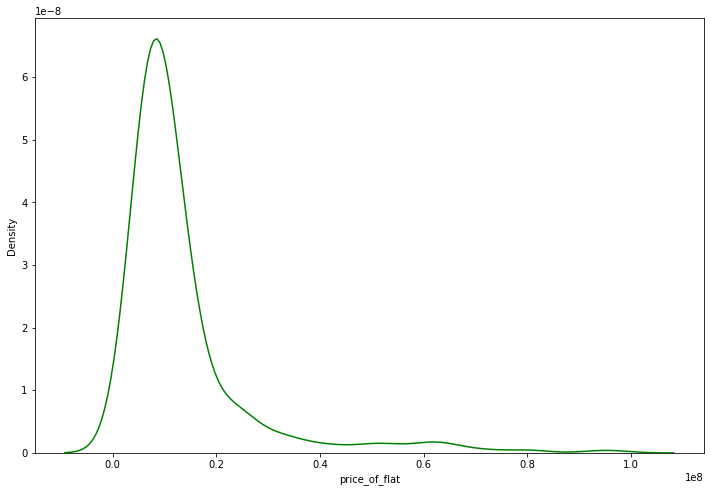

In [216]:
plt.figure(figsize = (12,8))
sns.distplot(df['price_of_flat'], kde = True,hist=False , rug = False , color = 'g')

<AxesSubplot:xlabel='status_of_flat', ylabel='no_of_rooms'>

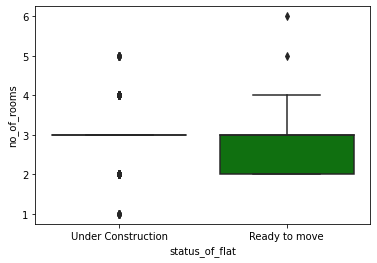

In [87]:
sns.boxplot(x="status_of_flat", y="no_of_rooms",
             palette=["m", "g"],
            data=df)

# Examples

# Example 1 :

# A middle-class person wants a flat in range of 60L to 80L

In [111]:
df[(df["price_of_flat"]>=6000000)&(df["price_of_flat"]<=8000000)]


,title,price_of_flat,status_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,area_in_city,place_circle_of_flat,no_of_rooms
7,3 BHK Apartment in Provident Kenworth,6448000.0,Ready to move,PProvident Housing Limited,6159.0,0 - 1 year old,1047,Rajendra,Provident Kenworth,3
8,3 BHK Apartment in Ayati Lake View,7823000.0,Under Construction,Ayati Properties,4802.0,Possession by Oct 2022,1630,Chengicherla,Ayati Lake View,3
19,2 BHK Apartment in Vaishnavi Houdini,7470000.0,Under Construction,Vaishnavi Infracon India Pvt Ltd,5199.0,Possession by Nov 2024,1437,Bandlaguda,Vaishnavi Houdi,2
21,3 BHK Apartment in Engineers Sri Tirumala Mill...,7513000.0,Under Construction,EAPL Group,4999.0,Possession by Feb 2022,1503,Mallampet,Engeers Sri Tirumala Millennium Phase II,3
37,2 BHK Apartment in Ramky Golden Circle,6366000.0,Under Construction,Ramky Estates Farms Ltd,4499.0,Possession by Nov 2023,1415,Tukkuguda,Ramky Golden Circle,2
...,...,...,...,...,...,...,...,...,...,...
524,3 BHK Villa in Harshith Westside Villas,6750000.0,Under Construction,Uuser,5000.0,Possession by Nov 2022,1350,Sangareddy,Harshith Westside Villas,3
525,2 BHK Villa in Harshith Westside Villas,6000000.0,Under Construction,Uuser,5000.0,Possession by Nov 2022,1200,Sangareddy,Harshith Westside Villas,2
527,3 BHK Villa in Harshith Westside Villas,7000000.0,Under Construction,Uuser,5000.0,Possession by Nov 2022,1400,Sangareddy,Harshith Westside Villas,3
557,2 BHK Apartment in Namishree Tulip Residency,7500000.0,Ready to move,SsellerVERIFIED,6944.0,7 - 8 years old,1080,Kondapur,Namishree Tulip Residency,2


In [88]:
df['area_in_city'].value_counts()

Mallampet            72
Manikonda            54
Tellapur             25
Gundlapochampally    24
Bachupally           21
Narsingi             20
Nizampet             17
Tukkuguda            16
Isnapur              15
Patancheru           14
Shaikpet             14
Chengicherla         12
Yapral               12
Sangareddy           12
Attapur              11
Manchirevula         11
Peerzadiguda         10
Kokapet              10
Kondapur              9
Bandlaguda            9
Nanakramguda          8
Hayathnagar           7
Osman                 7
Banjara               7
Miyapur               6
Shamshabad            6
Serilingampally       6
Kollur                5
Nandikandi            5
Rajendra              4
Gandipet              4
LB                    4
Sainikpuri            4
Sanath                2
Annojiguda            2
Kismatpur             2
Gajularamaram         2
Ameenpur              2
Hitech                2
Neredmet              2
Mansanpally           1
Pragathi        

## if a person wants an apartment in particular area say Nizampet

In [120]:
df[df['area_in_city']=='Nizampet']


,title,price_of_flat,status_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,area_in_city,place_circle_of_flat,no_of_rooms
25,3 BHK Apartment in Maruthi Elite,9075000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1650,Nizampet,Maruthi Elite,3
59,2 BHK Apartment in Maruthi Elite,6875000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1250,Nizampet,Maruthi Elite,2
92,3 BHK Apartment in Maruthi Elite,8552000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1555,Nizampet,Maruthi Elite,3
424,3 BHK Apartment in Maruthi Elite,9267000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1685,Nizampet,Maruthi Elite,3
425,2 BHK Apartment in Maruthi Elite,7837000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1425,Nizampet,Maruthi Elite,2
426,2 BHK Apartment in Maruthi Elite,6737000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1225,Nizampet,Maruthi Elite,2
427,2 BHK Apartment in Maruthi Elite,7892000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1435,Nizampet,Maruthi Elite,2
428,2 BHK Apartment in Maruthi Elite,7865000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1430,Nizampet,Maruthi Elite,2
429,2 BHK Apartment in Maruthi Elite,7370000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1340,Nizampet,Maruthi Elite,2
430,2 BHK Apartment in Maruthi Elite,6710000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1220,Nizampet,Maruthi Elite,2


In [90]:
df_flatSqft_nizampet = df_place[(df_place['flat_area_ins_sqft']<=2000) & (df_place['flat_area_ins_sqft']>=1000)]
df_flatSqft_nizampet

,title,price_of_flat,status_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,area_in_city,place_circle_of_flat,no_of_rooms
25,3 BHK Apartment in Maruthi Elite,9075000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1650,Nizampet,Maruthi Elite,3
59,2 BHK Apartment in Maruthi Elite,6875000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1250,Nizampet,Maruthi Elite,2
92,3 BHK Apartment in Maruthi Elite,8552000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1555,Nizampet,Maruthi Elite,3
424,3 BHK Apartment in Maruthi Elite,9267000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1685,Nizampet,Maruthi Elite,3
425,2 BHK Apartment in Maruthi Elite,7837000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1425,Nizampet,Maruthi Elite,2
426,2 BHK Apartment in Maruthi Elite,6737000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1225,Nizampet,Maruthi Elite,2
427,2 BHK Apartment in Maruthi Elite,7892000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1435,Nizampet,Maruthi Elite,2
428,2 BHK Apartment in Maruthi Elite,7865000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1430,Nizampet,Maruthi Elite,2
429,2 BHK Apartment in Maruthi Elite,7370000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1340,Nizampet,Maruthi Elite,2
430,2 BHK Apartment in Maruthi Elite,6710000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1220,Nizampet,Maruthi Elite,2


In [91]:
df_budget_niz = df_flatSqft_nizampet[(df_flatSqft_nizampet['price_of_flat']>=5000000) & (df_flatSqft_nizampet['price_of_flat']<=7000000)]
df_budget_niz

,title,price_of_flat,status_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,area_in_city,place_circle_of_flat,no_of_rooms
59,2 BHK Apartment in Maruthi Elite,6875000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1250,Nizampet,Maruthi Elite,2
426,2 BHK Apartment in Maruthi Elite,6737000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1225,Nizampet,Maruthi Elite,2
430,2 BHK Apartment in Maruthi Elite,6710000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1220,Nizampet,Maruthi Elite,2
433,2 BHK Apartment in Maruthi Elite,6930000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1260,Nizampet,Maruthi Elite,2
435,2 BHK Apartment in Maruthi Elite,6902000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1255,Nizampet,Maruthi Elite,2
437,2 BHK Apartment in Maruthi Elite,6957000.0,Ready to move,Maruthi Developers,5500.0,2 - 3 years old,1265,Nizampet,Maruthi Elite,2


### Customer needed highest squarefeet area flat so the highest area flat is costed 6930000.0

# Visualization of Taken Example

# A middle-class person want to own a flat
## His price is 70 to 80 lakhs and wants in nizampet

### Hence it is a developed area it is very rare to find the new flats

In [92]:
df.area_in_city.iplot(
    kind='hist',
    bins=100,
    xTitle='areas in Hyderabad',
    linecolor='red',
    yTitle='count',
    title='Histogram of areas of cities in Hyderabad')

In [93]:
df_place.price_of_flat.iplot(
    kind='hist',
    bins=100,
    xTitle='price_of_flats',
    linecolor='red',
    yTitle='count',
    title='Histogram of flats in Nizampet')

In [94]:

fig = px.pie(df_flatSqft_nizampet,names='flat_area_ins_sqft', values = 'price_of_flat' , title='balancing the flats by our range of sqfts')
fig.show()

In [95]:
#df_budget_niz
df_budget_niz.price_of_flat.iplot(
    kind='hist',
    bins=100,
    xTitle='price_of_flat',
    linecolor='white',
    color = 'blue',
    yTitle='count',
    title='Histogram of flats in nizampet by our conditions')

# Example 2 :

# Rich person wants a flat or a villa

In [96]:
df2 = df[(df['price_of_flat']>=30000000)]
df2.shape

(40, 10)

In [97]:
df2['area_in_city'].value_counts()

Tellapur           10
Narsingi            8
Serilingampally     6
Osman               6
LB                  3
Kismatpur           2
Shaikpet            2
Nallagandla         1
Mansanpally         1
Gandipet            1
Name: area_in_city, dtype: int64

In [98]:
df3 = df2[df2['area_in_city'] == 'Narsingi']
df3.head()

,title,price_of_flat,status_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,area_in_city,place_circle_of_flat,no_of_rooms
10,4 BHK Villa in Vessella Meadows,64200000.0,Under Construction,Vessella Group,18000.0,Possession by Jan 2023,3567,Narsingi,Vessella Meadows,4
45,3 BHK Villa in Vessella Meadows,52200000.0,Under Construction,Vessella Group,18000.0,Possession by Jan 2023,2900,Narsingi,Vessella Meadows,3
79,4 BHK Villa in Vessella Meadows,64000000.0,Under Construction,Vessella Group,18000.0,Possession by Jan 2023,3560,Narsingi,Vessella Meadows,4
205,3 BHK Villa in Vessella Meadows,52300000.0,Under Construction,Vessella Group,18000.0,Possession by Jan 2023,2908,Narsingi,Vessella Meadows,3
206,4 BHK Villa in Vessella Meadows,80300000.0,Under Construction,Vessella Group,18000.0,Possession by Jan 2023,4464,Narsingi,Vessella Meadows,4


In [99]:
df4 = df3[(df3['flat_area_ins_sqft']>= 4000) & (df3['flat_area_ins_sqft']<= 5500) ]
df4

,title,price_of_flat,status_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,area_in_city,place_circle_of_flat,no_of_rooms
206,4 BHK Villa in Vessella Meadows,80300000.0,Under Construction,Vessella Group,18000.0,Possession by Jan 2023,4464,Narsingi,Vessella Meadows,4
207,5 BHK Villa in Vessella Meadows,93900000.0,Under Construction,Vessella Group,18000.0,Possession by Jan 2023,5222,Narsingi,Vessella Meadows,5
208,4 BHK Villa in Vessella Meadows,79900000.0,Under Construction,Vessella Group,18000.0,Possession by Jan 2023,4444,Narsingi,Vessella Meadows,4
209,5 BHK Villa in Vessella Meadows,96600000.0,Under Construction,Vessella Group,18000.0,Possession by Jan 2023,5371,Narsingi,Vessella Meadows,5


In [100]:
df5 = df4[df4['no_of_rooms'] == 5]
df5

,title,price_of_flat,status_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,area_in_city,place_circle_of_flat,no_of_rooms
207,5 BHK Villa in Vessella Meadows,93900000.0,Under Construction,Vessella Group,18000.0,Possession by Jan 2023,5222,Narsingi,Vessella Meadows,5
209,5 BHK Villa in Vessella Meadows,96600000.0,Under Construction,Vessella Group,18000.0,Possession by Jan 2023,5371,Narsingi,Vessella Meadows,5


# Rich person want to buy a flat 

## Above 3 Crores flats in areas

In [101]:
df2.area_in_city.iplot(
    kind='hist',
    bins=100,
    xTitle='different areas of our range in Hyderabad ',
    linecolor='red',
    yTitle='count',
    title='Histogram of range of price of areas in Hyderabad')

In [102]:
df3.flat_area_ins_sqft.iplot(
    kind='hist',
    bins=100,
    xTitle='Narsangi Flats',
    linecolor='red',
    yTitle='count',
    title='Histogram of flats available in narsangi ')

In [103]:
fig = px.pie(df4,names='flat_area_ins_sqft', values = 'price_of_flat', title='Percentage of flats available in our range of our sqft')
fig.show()

In [104]:
fig = px.pie(df5,names='flat_area_ins_sqft',values = 'price_of_flat', title='Percentage of flats in narsangi with our range of sqft and price in Hyderabad')
fig.show()

# So finally we found two flats by your conditions of some minure price difference , You can go for anyone .

In [204]:
df.head()

,title,price_of_flat,status_of_flat,name_of_construction_company,cost_per_sqft,Date_of_completion,flat_area_ins_sqft,area_in_city,place_circle_of_flat,no_of_rooms
0,3 BHK Apartment in GHR Titania,13000000.0,Under Construction,GGHR Infra,6749.0,Possession by Nov 2023,1933,Kondapur,GHR Titania,3
1,3 BHK Apartment in Om Sree Heights,14700000.0,Under Construction,OOm Sree Builders And Developers,5800.0,Possession by May 2023,2545,Yapral,Om Sree Heights,3
2,1 BHK Apartment in Ramky Golden Circle,3779000.0,Under Construction,Ramky Estates Farms Ltd,4499.0,Possession by Nov 2023,840,Tukkuguda,Ramky Golden Circle,1
3,3 BHK Apartment in Cybercity Westbrook,14000000.0,Under Construction,Cyber City Oriana,7199.0,Possession by Sep 2026,1950,Kokapet,Cybercity Westbrook,3
4,4 BHK Villa in Sreenidhi Luxury Park 2,22700000.0,Under Construction,Supriya,6500.0,Possession by Nov 2023,3499,Shamshabad,Sreenidhi Luxury Park,4


C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price_of_flat', ylabel='flat_area_ins_sqft'>

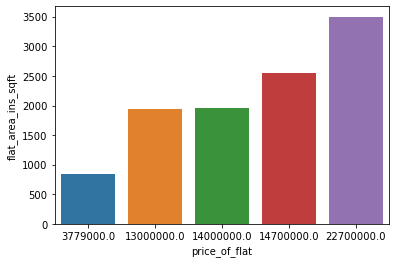

In [206]:
sns.barplot(df.price_of_flat.head(),df.flat_area_ins_sqft.head())

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price_of_flat'>

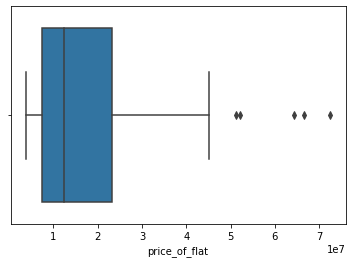

In [209]:
sns.boxplot(df.price_of_flat.head(55))

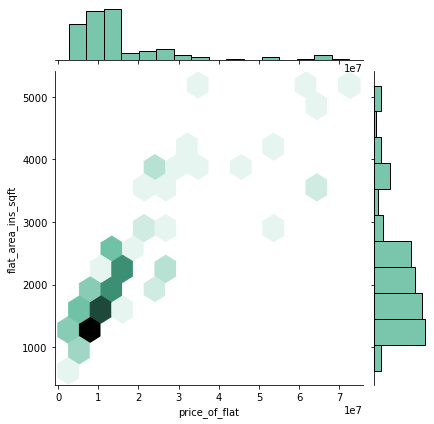

In [224]:
sns.jointplot(x=df.price_of_flat.head(100), y=df.flat_area_ins_sqft.head(100), kind="hex", color="#4CB391")

<AxesSubplot:xlabel='no_of_rooms', ylabel='title'>

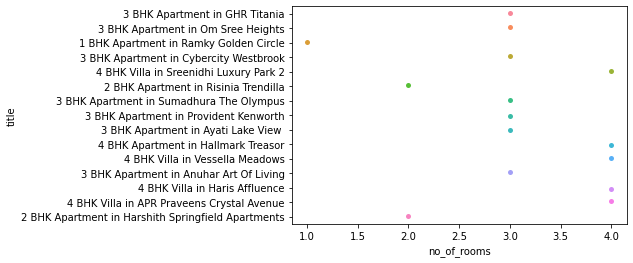

In [232]:
sns.stripplot(x="no_of_rooms", y="title", data=df.head(15))
